In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/face-mask-detection/annotations/maksssksksss737.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss410.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss537.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss295.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss771.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss234.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss620.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss70.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss281.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss393.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss296.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss756.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss260.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss57.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss224.xml
/kaggle/inpu

In [3]:
!pip install opencv-python

In [4]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os


In [5]:
import tensorflow as tf
from tensorflow import keras
import cv2


import glob
from xml.etree import ElementTree

In [6]:
print('Tensorflow Version: {}'.format(tf.__version__))
print('Keras Version: {}'.format(keras.__version__))

Tensorflow Version: 2.6.4
Keras Version: 2.6.0


In [7]:
annotations_directory = '../input/face-mask-detection/annotations'
images_directory = '../input/face-mask-detection/images'


In [8]:
annotations_files = !ls '../input/face-mask-detection/annotations'
annotations_files[:10]

['maksssksksss0.xml',
 'maksssksksss1.xml',
 'maksssksksss10.xml',
 'maksssksksss100.xml',
 'maksssksksss101.xml',
 'maksssksksss102.xml',
 'maksssksksss103.xml',
 'maksssksksss104.xml',
 'maksssksksss105.xml',
 'maksssksksss106.xml']

In [9]:
annotations_files = !ls '../input/face-mask-detection/annotations'
annotations_files[:10]

['maksssksksss0.xml',
 'maksssksksss1.xml',
 'maksssksksss10.xml',
 'maksssksksss100.xml',
 'maksssksksss101.xml',
 'maksssksksss102.xml',
 'maksssksksss103.xml',
 'maksssksksss104.xml',
 'maksssksksss105.xml',
 'maksssksksss106.xml']

In [10]:
images_files = !ls '../input/face-mask-detection/images'
images_files[:10]

['maksssksksss0.png',
 'maksssksksss1.png',
 'maksssksksss10.png',
 'maksssksksss100.png',
 'maksssksksss101.png',
 'maksssksksss102.png',
 'maksssksksss103.png',
 'maksssksksss104.png',
 'maksssksksss105.png',
 'maksssksksss106.png']

In [11]:
len(annotations_files), len(images_files)

(853, 853)

In [12]:
information = {'xmin': [], 'ymin': [], 'xmax': [], 'ymax': [], 'label': [], 'file': [], 'width': [], 'height': []}

for annotation in glob.glob(annotations_directory + '/*.xml'):
    tree = ElementTree.parse(annotation)
    
    for element in tree.iter():
        if 'size' in element.tag:
            for attribute in list(element):
                if 'width' in attribute.tag: 
                    width = int(round(float(attribute.text)))
                if 'height' in attribute.tag:
                    height = int(round(float(attribute.text)))    

        if 'object' in element.tag:
            for attribute in list(element):
                
                if 'name' in attribute.tag:
                    name = attribute.text                 
                    information['label'] += [name]
                    information['width'] += [width]
                    information['height'] += [height] 
                    information['file'] += [annotation.split('/')[-1][0:-4]] 
                            
                if 'bndbox' in attribute.tag:
                    for dimension in list(attribute):
                        if 'xmin' in dimension.tag:
                            xmin = int(round(float(dimension.text)))
                            information['xmin'] += [xmin]
                        if 'ymin' in dimension.tag:
                            ymin = int(round(float(dimension.text)))
                            information['ymin'] += [ymin]                                
                        if 'xmax' in dimension.tag:
                            xmax = int(round(float(dimension.text)))
                            information['xmax'] += [xmax]                                
                        if 'ymax' in dimension.tag:
                            ymax = int(round(float(dimension.text)))
                            information['ymax'] += [ymax]

In [13]:
annotations_info_df = pd.DataFrame(information)
annotations_info_df.head(10)

,xmin,ymin,xmax,ymax,label,file,width,height
0,28,55,46,71,with_mask,maksssksksss737,400,226
1,98,62,111,78,with_mask,maksssksksss737,400,226
2,159,50,193,90,mask_weared_incorrect,maksssksksss737,400,226
3,293,59,313,80,with_mask,maksssksksss737,400,226
4,352,51,372,72,with_mask,maksssksksss737,400,226
5,228,53,241,73,with_mask,maksssksksss737,400,226
6,34,153,62,176,with_mask,maksssksksss410,400,267
7,88,138,111,163,with_mask,maksssksksss410,400,267
8,139,207,168,234,with_mask,maksssksksss410,400,267
9,116,135,135,154,with_mask,maksssksksss410,400,267


In [14]:
annotations_info_df['annotation_file'] = annotations_info_df['file'] + '.xml'
annotations_info_df['image_file'] = annotations_info_df['file'] + '.png'


annotations_info_df.loc[annotations_info_df['label'] == 'mask_weared_incorrect', 'label'] = 'mask_incorrectly_worn'

In [15]:
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,28,55,46,71,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
1,98,62,111,78,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
2,159,50,193,90,mask_incorrectly_worn,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
3,293,59,313,80,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
4,352,51,372,72,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
...,...,...,...,...,...,...,...,...,...,...
4067,229,53,241,72,with_mask,maksssksksss13,400,226,maksssksksss13.xml,maksssksksss13.png
4068,51,144,128,239,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png
4069,147,169,217,233,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png
4070,224,92,309,186,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png


In [16]:
def render_image(image):
    plt.figure(figsize = (12, 8))
    plt.imshow(image)
    plt.show()
    

In [17]:
def convert_to_RGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [18]:
annotations_info_df['image_file'].iloc[0]

'maksssksksss737.png'

In [19]:
image_737_path = '../input/face-mask-detection/images/' + annotations_info_df['image_file'].iloc[0]
image_737_path

'../input/face-mask-detection/images/maksssksksss737.png'

In [20]:
# Read Image 737 Using It's Path
image_737 = cv2.imread(image_737_path)
image_737

array([[[150, 210,  96],
        [147, 205,  94],
        [148, 203,  94],
        ...,
        [ 95,  97,  97],
        [ 93,  95,  96],
        [ 84,  86,  86]],

       [[148, 207,  95],
        [148, 206,  95],
        [150, 207,  95],
        ...,
        [ 96,  98,  98],
        [ 94,  96,  97],
        [ 84,  86,  87]],

       [[147, 206,  94],
        [147, 205,  94],
        [150, 208,  96],
        ...,
        [ 96,  96,  97],
        [ 93,  93,  94],
        [ 83,  83,  84]],

       ...,

       [[ 99, 101,  87],
        [ 58,  58,  50],
        [109, 107, 102],
        ...,
        [ 61,  72,  76],
        [ 88,  99, 101],
        [ 86,  95,  95]],

       [[104, 103,  92],
        [ 56,  53,  45],
        [102,  97,  91],
        ...,
        [ 80,  83,  89],
        [113, 114, 119],
        [135, 135, 138]],

       [[113, 111, 100],
        [ 62,  59,  49],
        [ 95,  90,  83],
        ...,
        [ 76,  91, 100],
        [ 99, 112, 119],
        [103, 114, 119]]

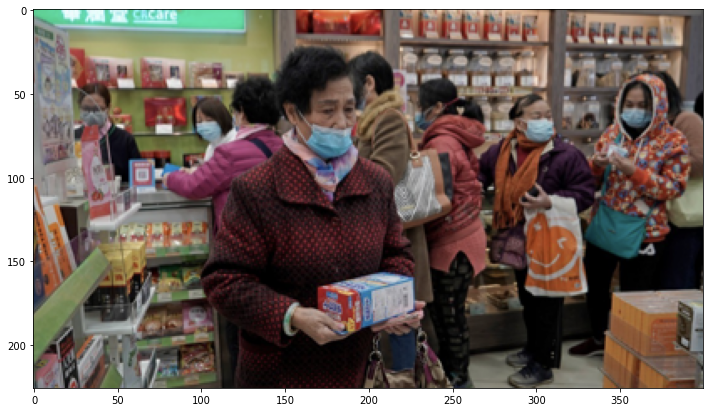

In [21]:
render_image(convert_to_RGB(image_737))

In [22]:
annotation_737_path = '../input/face-mask-detection/annotations/' + annotations_info_df['annotation_file'].iloc[0]
annotation_737_path


'../input/face-mask-detection/annotations/maksssksksss737.xml'

In [23]:
image_737.shape

(226, 400, 3)

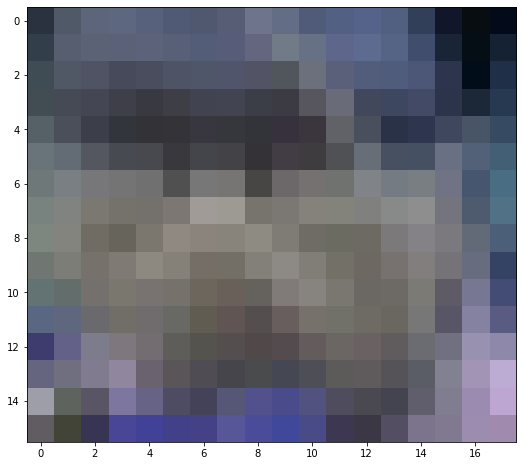

In [24]:
x = annotations_info_df['xmin'].iloc[0]
y = annotations_info_df['ymin'].iloc[0]
width = annotations_info_df['xmax'].iloc[0]
height = annotations_info_df['ymax'].iloc[0]

cropped_737 = image_737[y:height, x:width]
render_image(cropped_737)

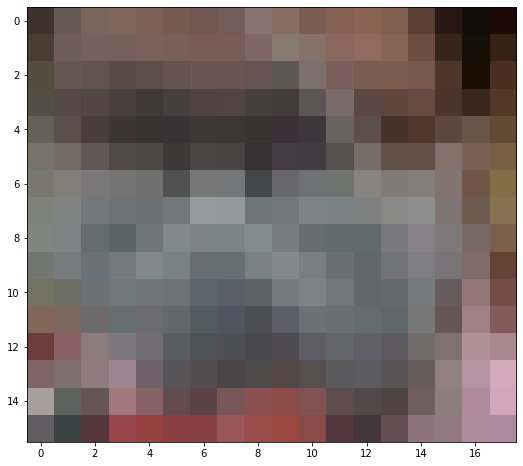

In [25]:
render_image(convert_to_RGB(cropped_737))

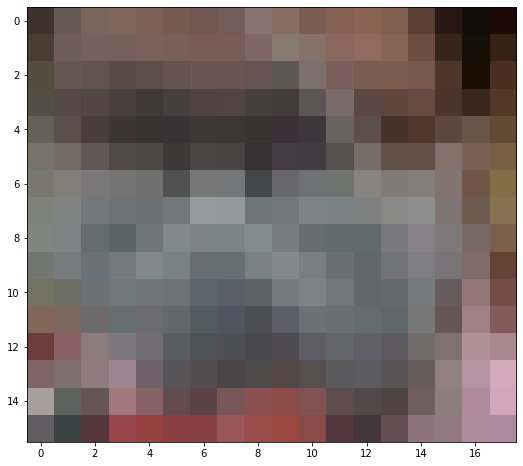

In [26]:
render_image(convert_to_RGB(cropped_737))

In [27]:
annotations_info_df.head(10)

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,28,55,46,71,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
1,98,62,111,78,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
2,159,50,193,90,mask_incorrectly_worn,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
3,293,59,313,80,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
4,352,51,372,72,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
5,228,53,241,73,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
6,34,153,62,176,with_mask,maksssksksss410,400,267,maksssksksss410.xml,maksssksksss410.png
7,88,138,111,163,with_mask,maksssksksss410,400,267,maksssksksss410.xml,maksssksksss410.png
8,139,207,168,234,with_mask,maksssksksss410,400,267,maksssksksss410.xml,maksssksksss410.png
9,116,135,135,154,with_mask,maksssksksss410,400,267,maksssksksss410.xml,maksssksksss410.png


In [28]:
!ls '../input/face-mask-detection'

annotations  images


In [29]:
directory = 'cropped_images'
parent_directory = '/kaggle/working'
path = os.path.join(parent_directory, directory)
os.mkdir(path)

In [30]:
!ls './'

__notebook__.ipynb  cropped_images


In [31]:
annotations_info_df['cropped_image_file'] = annotations_info_df['file']
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
0,28,55,46,71,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737
1,98,62,111,78,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737
2,159,50,193,90,mask_incorrectly_worn,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737
3,293,59,313,80,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737
4,352,51,372,72,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737
...,...,...,...,...,...,...,...,...,...,...,...
4067,229,53,241,72,with_mask,maksssksksss13,400,226,maksssksksss13.xml,maksssksksss13.png,maksssksksss13
4068,51,144,128,239,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138
4069,147,169,217,233,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138
4070,224,92,309,186,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138


In [32]:
for i in range(len(annotations_info_df)):
    # Get The File Path and Read The Image
    image_filepath = '../input/face-mask-detection/images/' + annotations_info_df['image_file'].iloc[i]
    image = cv2.imread(image_filepath)
    
    # Set The Cropped Image File Name
    annotations_info_df['cropped_image_file'].iloc[i] = annotations_info_df['cropped_image_file'].iloc[i] + '-' + str(i) + '.png'
    cropped_image_filename = annotations_info_df['cropped_image_file'].iloc[i]
    
    # Get The xmin, ymin, xmax, ymax Value (Bounding Box) to Crop Image
    xmin = annotations_info_df['xmin'].iloc[i]
    ymin = annotations_info_df['ymin'].iloc[i]
    xmax = annotations_info_df['xmax'].iloc[i]
    ymax = annotations_info_df['ymax'].iloc[i]
    cropped_image = image[ymin:ymax, xmin:xmax]
    
    # Save Cropped Image
    cropped_image_directory = os.path.join('./cropped_images', cropped_image_filename) 
    cv2.imwrite(cropped_image_directory, cropped_image)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [33]:
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
0,28,55,46,71,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737-0.png
1,98,62,111,78,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737-1.png
2,159,50,193,90,mask_incorrectly_worn,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737-2.png
3,293,59,313,80,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737-3.png
4,352,51,372,72,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737-4.png
...,...,...,...,...,...,...,...,...,...,...,...
4067,229,53,241,72,with_mask,maksssksksss13,400,226,maksssksksss13.xml,maksssksksss13.png,maksssksksss13-4067.png
4068,51,144,128,239,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138-4068.png
4069,147,169,217,233,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138-4069.png
4070,224,92,309,186,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138-4070.png


In [34]:
cropped_images_files = !ls './cropped_images'
cropped_images_files[:10]

['maksssksksss0-978.png',
 'maksssksksss0-979.png',
 'maksssksksss0-980.png',
 'maksssksksss1-3455.png',
 'maksssksksss1-3456.png',
 'maksssksksss1-3457.png',
 'maksssksksss1-3458.png',
 'maksssksksss1-3459.png',
 'maksssksksss1-3460.png',
 'maksssksksss1-3461.png']

In [35]:
print('There are {} cropped images in total.'.format(len(cropped_images_files)))

There are 4072 cropped images in total.


In [36]:
annotations_info_df['cropped_image_file'].iloc[0]

'maksssksksss737-0.png'

In [37]:
cropped_737_0_path = './cropped_images/' + annotations_info_df['cropped_image_file'].iloc[0]
cropped_737_0_path

'./cropped_images/maksssksksss737-0.png'

In [38]:
cropped_737_0 = cv2.imread(cropped_737_0_path)
cropped_737_0

array([[[ 43,  50,  63],
        [ 80,  89, 104],
        [ 93, 101, 122],
        [ 94, 103, 128],
        [ 88,  97, 124],
        [ 81,  90, 116],
        [ 80,  88, 112],
        [ 86,  93, 116],
        [110, 116, 140],
        [100, 109, 134],
        [ 79,  91, 121],
        [ 82,  96, 132],
        [ 85,  99, 138],
        [ 81,  96, 129],
        [ 50,  63,  89],
        [ 17,  23,  41],
        [  8,  13,  18],
        [  3,  10,  26]],

       [[ 50,  62,  74],
        [ 86,  94, 111],
        [ 92,  98, 117],
        [ 91,  98, 119],
        [ 91,  98, 122],
        [ 88,  96, 120],
        [ 84,  93, 119],
        [ 87,  93, 120],
        [ 99, 102, 126],
        [113, 122, 135],
        [103, 113, 133],
        [ 94, 103, 139],
        [ 94, 107, 145],
        [ 85, 100, 133],
        [ 64,  77, 108],
        [ 26,  36,  55],
        [  5,  14,  21],
        [ 21,  34,  52]],

       [[ 63,  76,  84],
        [ 80,  88, 101],
        [ 79,  83,  99],
        [ 70,  74,  9

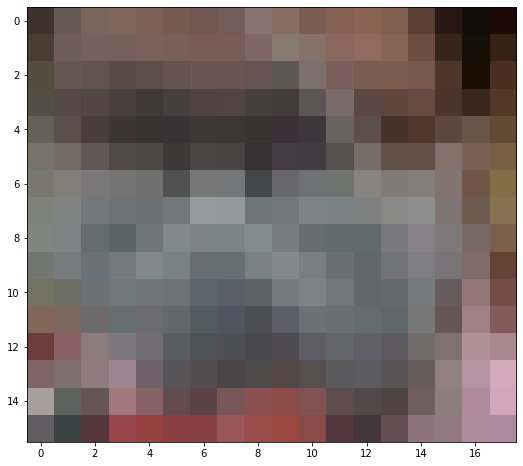

In [39]:
render_image(convert_to_RGB(cropped_737_0))

In [40]:
cropped_737_0.shape

(16, 18, 3)

In [41]:
test_df = annotations_info_df[:800]
train_df = annotations_info_df[800:]



In [42]:
train_df.shape, test_df.shape

((3272, 11), (800, 11))

In [43]:
train_df.head()

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
800,187,121,267,201,with_mask,maksssksksss665,400,267,maksssksksss665.xml,maksssksksss665.png,maksssksksss665-800.png
801,252,21,293,69,with_mask,maksssksksss665,400,267,maksssksksss665.xml,maksssksksss665.png,maksssksksss665-801.png
802,339,16,369,74,with_mask,maksssksksss665,400,267,maksssksksss665.xml,maksssksksss665.png,maksssksksss665-802.png
803,325,138,389,201,with_mask,maksssksksss665,400,267,maksssksksss665.xml,maksssksksss665.png,maksssksksss665-803.png
804,111,203,221,355,with_mask,maksssksksss598,301,400,maksssksksss598.xml,maksssksksss598.png,maksssksksss598-804.png


In [44]:
classes = list(train_df['label'].unique())

In [45]:
print(classes)

['with_mask', 'mask_incorrectly_worn', 'without_mask']


In [46]:
train_df


,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
800,187,121,267,201,with_mask,maksssksksss665,400,267,maksssksksss665.xml,maksssksksss665.png,maksssksksss665-800.png
801,252,21,293,69,with_mask,maksssksksss665,400,267,maksssksksss665.xml,maksssksksss665.png,maksssksksss665-801.png
802,339,16,369,74,with_mask,maksssksksss665,400,267,maksssksksss665.xml,maksssksksss665.png,maksssksksss665-802.png
803,325,138,389,201,with_mask,maksssksksss665,400,267,maksssksksss665.xml,maksssksksss665.png,maksssksksss665-803.png
804,111,203,221,355,with_mask,maksssksksss598,301,400,maksssksksss598.xml,maksssksksss598.png,maksssksksss598-804.png
...,...,...,...,...,...,...,...,...,...,...,...
4067,229,53,241,72,with_mask,maksssksksss13,400,226,maksssksksss13.xml,maksssksksss13.png,maksssksksss13-4067.png
4068,51,144,128,239,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138-4068.png
4069,147,169,217,233,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138-4069.png
4070,224,92,309,186,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138-4070.png


In [47]:
train_df[train_df['file'] == 'maksssksksss139']['label'].unique()

array(['with_mask', 'without_mask', 'mask_incorrectly_worn'], dtype=object)

In [48]:
image_52_path = '../input/face-mask-detection/images/maksssksksss52.png'
image_52 = cv2.imread(image_52_path)
image_52

array([[[201, 186, 190],
        [178, 169, 171],
        [126, 120, 121],
        ...,
        [ 21,  15,  17],
        [ 21,  15,  17],
        [ 21,  15,  17]],

       [[178, 164, 164],
        [168, 159, 157],
        [163, 157, 154],
        ...,
        [ 21,  15,  17],
        [ 21,  15,  17],
        [ 21,  15,  17]],

       [[146, 135, 132],
        [145, 138, 134],
        [148, 144, 139],
        ...,
        [ 21,  15,  17],
        [ 21,  15,  17],
        [ 21,  15,  17]],

       ...,

       [[ 29,  30,  33],
        [ 29,  30,  33],
        [ 29,  30,  33],
        ...,
        [ 42,  50,  58],
        [ 40,  48,  56],
        [ 42,  51,  59]],

       [[ 31,  32,  33],
        [ 31,  32,  33],
        [ 31,  33,  33],
        ...,
        [ 41,  49,  57],
        [ 41,  49,  57],
        [ 45,  53,  61]],

       [[ 34,  35,  36],
        [ 35,  37,  38],
        [ 37,  39,  40],
        ...,
        [ 42,  50,  58],
        [ 39,  47,  55],
        [ 44,  52,  60]]

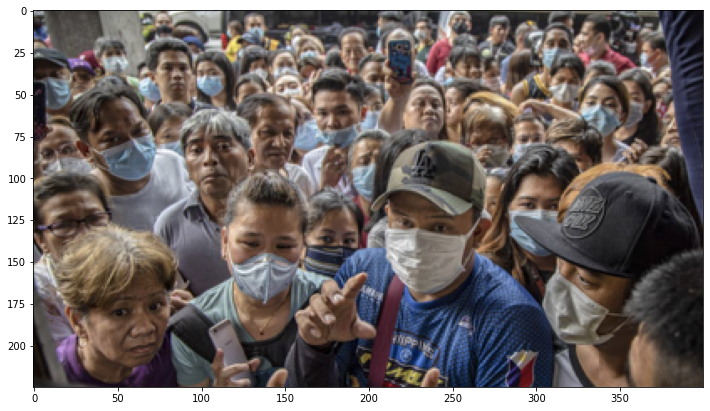

In [49]:
image_52_rgb = convert_to_RGB(image_52)
render_image(image_52_rgb)

In [50]:
image_52_df = train_df[train_df['file'] == 'maksssksksss52']
image_52_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
3784,37,166,84,214,without_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3784.png
3785,6,117,47,149,without_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3785.png
3786,2,77,35,99,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3786.png
3787,39,65,75,103,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3787.png
3788,76,69,92,88,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3788.png
3789,92,74,129,113,without_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3789.png
3790,116,132,161,175,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3790.png
3791,161,130,195,163,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3791.png
3792,209,119,262,170,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3792.png
3793,191,84,208,117,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3793.png


In [51]:
with_mask_list, without_mask_list, incorrectly_worn_list = [], [], []
for i in range(len(image_52_df)):
    bounding_box = [image_52_df['xmin'].iloc[i], image_52_df['ymin'].iloc[i],
                    image_52_df['xmax'].iloc[i], image_52_df['ymax'].iloc[i]]
    if image_52_df['label'].iloc[i] == 'with_mask':
        with_mask_list.append(bounding_box)
    elif image_52_df['label'].iloc[i] == 'without_mask':
        without_mask_list.append(bounding_box)
    else:
        incorrectly_worn_list.append(bounding_box)
        
found_objects_dict = {'With Mask': with_mask_list, 
                      'Without Mask': without_mask_list, 
                      'Incorrectly Worn': incorrectly_worn_list}
found_objects_dict

{'With Mask': [[2, 77, 35, 99],
  [39, 65, 75, 103],
  [76, 69, 92, 88],
  [116, 132, 161, 175],
  [161, 130, 195, 163],
  [209, 119, 262, 170],
  [191, 84, 208, 117],
  [63, 37, 77, 56],
  [41, 23, 58, 40],
  [1, 34, 24, 61],
  [73, 5, 84, 16],
  [94, 22, 103, 33],
  [97, 34, 115, 53],
  [157, 61, 173, 84],
  [145, 42, 160, 56],
  [127, 31, 142, 44],
  [143, 29, 160, 42],
  [129, 7, 139, 19],
  [115, 10, 120, 19],
  [154, 13, 163, 24],
  [159, 21, 171, 32],
  [197, 37, 214, 58],
  [194, 54, 211, 73],
  [205, 6, 210, 18],
  [228, 9, 236, 19],
  [250, 4, 261, 16],
  [260, 74, 285, 97],
  [270, 33, 281, 49],
  [268, 110, 279, 127],
  [284, 111, 316, 150],
  [303, 147, 352, 203],
  [328, 51, 352, 77],
  [352, 48, 366, 71],
  [286, 73, 307, 90],
  [310, 39, 329, 58],
  [304, 16, 322, 36],
  [362, 23, 370, 36]],
 'Without Mask': [[37, 166, 84, 214],
  [6, 117, 47, 149],
  [92, 74, 129, 113],
  [131, 67, 157, 97],
  [221, 51, 246, 77],
  [74, 31, 96, 53],
  [185, 20, 200, 37],
  [246, 51, 25

In [52]:
train_df['label'].value_counts()

with_mask                2581
without_mask              586
mask_incorrectly_worn     105
Name: label, dtype: int64

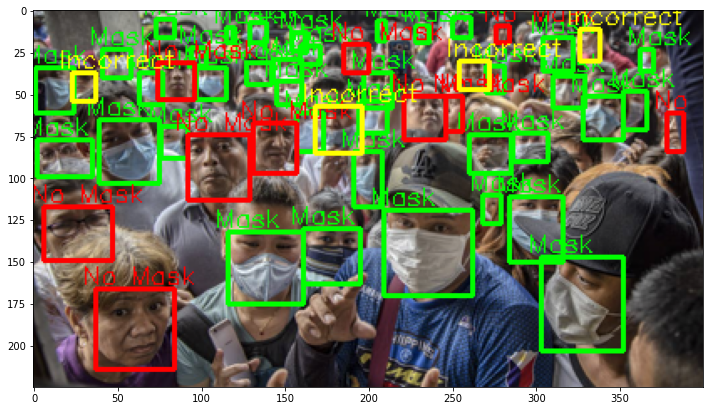

In [53]:
for key, value in found_objects_dict.items():
    for i in range(len(value)):
        color = (0, 255, 0) # green
        text = 'Mask'
        if key == 'Without Mask':
            color = (255, 0, 0) # red
            text = 'No Mask'
        elif key == 'Incorrectly Worn':
            color = (255, 255, 0) # yellow
            text = 'Incorrect'
        start_point = (value[i][0], value[i][1])
        end_point = (value[i][2], value[i][3])
        cv2.rectangle(image_52_rgb, start_point, end_point, color = color, thickness = 2)
        cv2.putText(image_52_rgb, org = (value[i][0] - 8, value[i][1] - 3), text = text, 
                    fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 0.5, color = color)
render_image(image_52_rgb)

In [54]:
sorted_label_df = pd.DataFrame(train_df['label'].value_counts()).reset_index()
sorted_label_df.rename(columns = {'index': 'label', 'label': 'count'}, inplace = True)
sorted_label_df

,label,count
0,with_mask,2581
1,without_mask,586
2,mask_incorrectly_worn,105


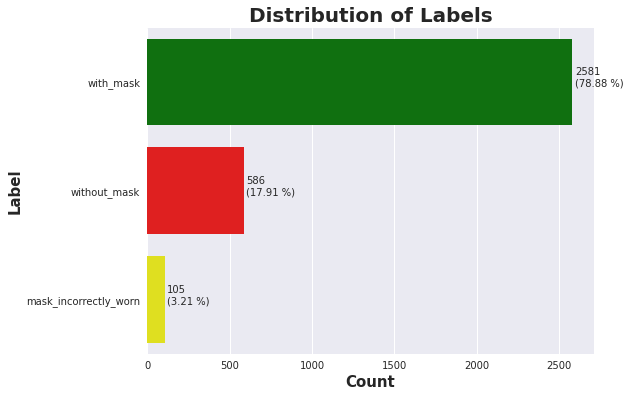

In [55]:
plt.style.use('seaborn')
plt.figure(figsize = (8, 6))
barplot = sns.barplot(x = 'count', y = 'label', data = sorted_label_df, orient = 'horizontal', 
                      palette = ['green', 'red', 'yellow'])
plt.title('Distribution of Labels', fontsize = 20, fontweight = 'bold')
plt.xlabel('Count', fontsize = 15, fontweight = 'bold')
plt.ylabel('Label', fontsize = 15, fontweight = 'bold')

for p in barplot.patches:
    width = p.get_width()
    percentage = round(width * 100 / sum(sorted_label_df['count']), 2)
    plt.text(x = width + 15, y = p.get_y() + 0.55 * p.get_height(), s = f'{int(width)}\n({percentage} %)')

plt.show()

In [56]:
cropped_image_path = './cropped_images/' + train_df['cropped_image_file'].iloc[0]
cropped_image = cv2.imread(cropped_image_path)
cropped_image.shape

(80, 80, 3)

In [57]:
cropped_image.shape[0]

80

In [58]:
image_width = []
image_height = []
for i in range(len(train_df)):
    cropped_image_path = './cropped_images/' + train_df['cropped_image_file'].iloc[i]
    cropped_image = cv2.imread(cropped_image_path)
    image_width.append(cropped_image.shape[0])
    image_height.append(cropped_image.shape[1])

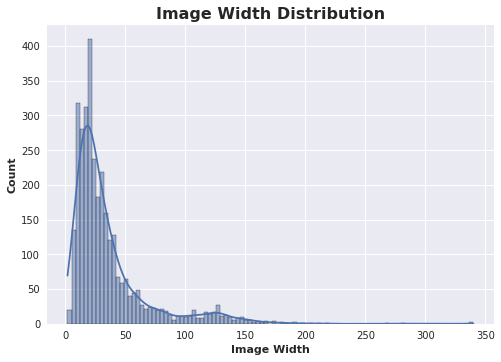

In [59]:
sns.histplot(image_width, kde = True)
plt.title('Image Width Distribution', fontsize = 16, fontweight = 'bold')
plt.xlabel('Image Width', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.show()

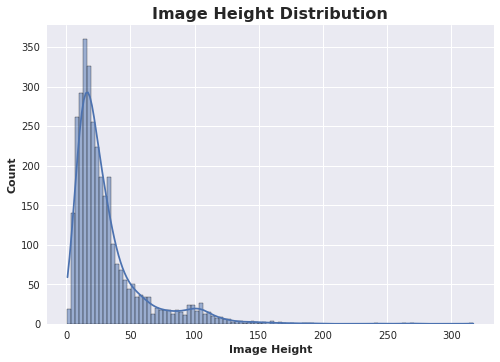

In [60]:
sns.histplot(image_height, kde = True)
plt.title('Image Height Distribution', fontsize = 16, fontweight = 'bold')
plt.xlabel('Image Height', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold') 
plt.show()


In [61]:
print('IMAGE WIDTH')
print(f'Min: {min(image_width)}')
print(f'Max: {max(image_width)}')
print(f'Mean: {np.mean(image_width)}')
print(f'Median: {np.median(image_width)}')
print('IMAGE HEIGHT')
print(f'Min: {min(image_height)}')
print(f'Max: {max(image_height)}')
print(f'Mean: {np.mean(image_height)}')
print(f'Median: {np.median(image_height)}')

IMAGE WIDTH
Min: 2
Max: 340
Mean: 35.691625916870414
Median: 24.0
IMAGE HEIGHT
Min: 1
Max: 317
Mean: 31.610024449877752
Median: 22.0


In [62]:
image_target_size = (int(np.median(image_width)), int(np.median(image_height)))
image_target_size

(24, 22)

In [63]:
from keras_preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(rescale = 1. / 255., validation_split = 0.25)

train_generator = train_image_generator.flow_from_dataframe(
    dataframe = train_df,
    directory = './cropped_images',
    x_col = 'cropped_image_file',
    y_col = 'label',
    subset = 'training',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = image_target_size
)
valid_generator = train_image_generator.flow_from_dataframe(
    dataframe = train_df,
    directory = './cropped_images',
    x_col = 'cropped_image_file',
    y_col = 'label',
    subset = 'validation',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = image_target_size
)

Found 2454 validated image filenames belonging to 3 classes.
Found 818 validated image filenames belonging to 3 classes.


In [64]:
test_image_generator = ImageDataGenerator(rescale = 1. / 255.)

test_generator = train_image_generator.flow_from_dataframe(
    dataframe = test_df,
    directory = './cropped_images',
    x_col = 'cropped_image_file',
    y_col = 'label',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = image_target_size
)

Found 800 validated image filenames belonging to 3 classes.


In [65]:
print(train_generator)
print(valid_generator)
print(test_generator)

In [66]:
input_shape = [int(np.median(image_width)), int(np.median(image_height)), 3]

In [67]:
model_1 = keras.models.Sequential([
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', 
                        input_shape = input_shape),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(units = len(classes), activation = 'softmax')
])

2022-07-25 07:00:43.926904: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [68]:
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy', keras.metrics.Recall()])

history_1 = model_1.fit(train_generator, epochs = 10, steps_per_epoch = len(train_generator), 
                        validation_data = valid_generator, validation_steps = len(valid_generator))

2022-07-25 07:00:44.267820: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
77/77 [==============================] - 3s 30ms/step - loss: 0.6797 - accuracy: 0.7425 - recall: 0.6178 - val_loss: 0.4767 - val_accuracy: 0.7934 - val_recall: 0.7873
Epoch 2/10
77/77 [==============================] - 2s 30ms/step - loss: 0.3835 - accuracy: 0.8765 - recall: 0.8504 - val_loss: 0.2890 - val_accuracy: 0.9242 - val_recall: 0.9071
Epoch 3/10
77/77 [==============================] - 2s 23ms/step - loss: 0.3103 - accuracy: 0.9075 - recall: 0.8977 - val_loss: 0.2881 - val_accuracy: 0.9181 - val_recall: 0.9083
Epoch 4/10
77/77 [==============================] - 2s 22ms/step - loss: 0.2891 - accuracy: 0.9152 - recall: 0.9059 - val_loss: 0.2831 - val_accuracy: 0.9108 - val_recall: 0.9010
Epoch 5/10
77/77 [==============================] - 2s 29ms/step - loss: 0.2681 - accuracy: 0.9185 - recall: 0.9104 - val_loss: 0.2206 - val_accuracy: 0.9352 - val_recall: 0.9340
Epoch 6/10
77/77 [==============================] - 2s 22ms/step - loss: 0.2485 - accuracy: 0.9226 - reca

In [69]:
result_1 = pd.DataFrame(history_1.history)
result_1

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
0,0.679695,0.742461,0.617767,0.476734,0.793399,0.787286
1,0.383471,0.876528,0.850448,0.288982,0.924205,0.907090
2,0.310256,0.907498,0.897718,0.288125,0.918093,0.908313
3,0.289083,0.915240,0.905868,0.283125,0.910758,0.900978
4,0.268109,0.918500,0.910350,0.220597,0.935208,0.933985
5,0.248523,0.922575,0.914833,0.215440,0.942543,0.937653
6,0.250317,0.916870,0.906275,0.260388,0.929095,0.919315
7,0.230923,0.924613,0.918093,0.254619,0.924205,0.914425
8,0.232796,0.928280,0.925020,0.206697,0.944988,0.943765
9,0.210592,0.931948,0.927058,0.237766,0.931540,0.924205


<AxesSubplot:>

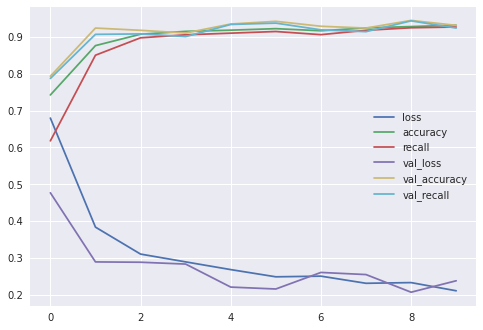

In [70]:
result_1.plot()

In [71]:
def plot_line(result, ax, col, title, train_column, valid_column):
    # Line Plot of Model Performance
    ax[col].plot(result[train_column])
    ax[col].plot(result[valid_column])
    
    # Title and Legend
    ax[col].set_title(title, fontweight = 'bold')
    ax[col].legend(['Train', 'Validation'])
    
def plot_result(result, train_recall, valid_recall):
    # Create a 1x3 Grid and Set Main Title
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (17, 8))
    fig.suptitle('Model Performance', fontsize = 20, fontweight = 'bold')
    
    # Visualization of Accuracy, Recall, and Loss
    plot_line(result, ax, 0, 'Accuracy', 'accuracy', 'val_accuracy')
    plot_line(result, ax, 1, 'Recall', train_recall, valid_recall)
    plot_line(result, ax, 2, 'Loss', 'loss', 'val_loss')
    plt.show()

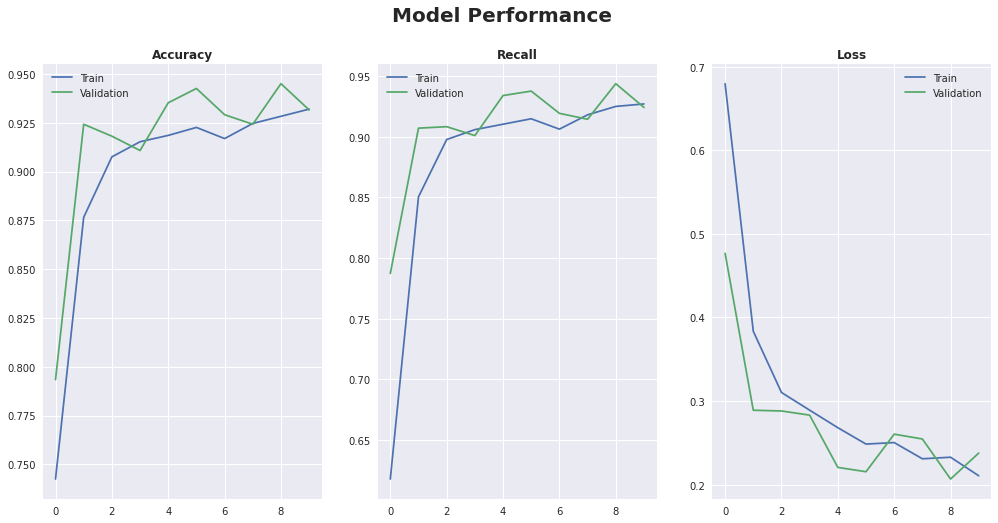

In [72]:
plot_result(result_1, 'recall', 'val_recall')

In [73]:
model_2 = keras.models.Sequential([
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = input_shape),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(units = len(classes), activation = 'softmax')
])

In [74]:
model_2.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy', keras.metrics.Recall()])

callback = [keras.callbacks.EarlyStopping(patience = 4)]

history_2 = model_2.fit(train_generator, epochs = 20, steps_per_epoch = len(train_generator), 
                        validation_data = valid_generator, validation_steps = len(valid_generator),
                        callbacks = [callback])

Epoch 1/20
77/77 [==============================] - 3s 29ms/step - loss: 0.5350 - accuracy: 0.7877 - recall_1: 0.7673 - val_loss: 0.4264 - val_accuracy: 0.7922 - val_recall_1: 0.7848
Epoch 2/20
77/77 [==============================] - 2s 25ms/step - loss: 0.3714 - accuracy: 0.8606 - recall_1: 0.8113 - val_loss: 0.2969 - val_accuracy: 0.9193 - val_recall_1: 0.9095
Epoch 3/20
77/77 [==============================] - 2s 22ms/step - loss: 0.2874 - accuracy: 0.9169 - recall_1: 0.9091 - val_loss: 0.2413 - val_accuracy: 0.9328 - val_recall_1: 0.9291
Epoch 4/20
77/77 [==============================] - 2s 22ms/step - loss: 0.2568 - accuracy: 0.9214 - recall_1: 0.9144 - val_loss: 0.2312 - val_accuracy: 0.9340 - val_recall_1: 0.9315
Epoch 5/20
77/77 [==============================] - 2s 25ms/step - loss: 0.2442 - accuracy: 0.9238 - recall_1: 0.9165 - val_loss: 0.2385 - val_accuracy: 0.9218 - val_recall_1: 0.9181
Epoch 6/20
77/77 [==============================] - 2s 25ms/step - loss: 0.2351 - acc

In [75]:
result_2 = pd.DataFrame(history_2.history)
result_2

,loss,accuracy,recall_1,val_loss,val_accuracy,val_recall_1
0,0.534995,0.787694,0.767319,0.426398,0.792176,0.784841
1,0.371352,0.860636,0.811328,0.296853,0.919315,0.909535
2,0.287358,0.916870,0.909128,0.241343,0.932763,0.929095
3,0.256806,0.921353,0.914425,0.231169,0.933985,0.931540
4,0.244187,0.923798,0.916463,0.238544,0.921760,0.918093
5,0.235087,0.922983,0.916870,0.215485,0.935208,0.931540
6,0.228774,0.923390,0.916055,0.212153,0.947433,0.942543
7,0.214572,0.928280,0.923798,0.212265,0.946210,0.944988
8,0.214499,0.929910,0.924205,0.211213,0.937653,0.933985
9,0.210574,0.929910,0.925020,0.210059,0.942543,0.938875


<AxesSubplot:>

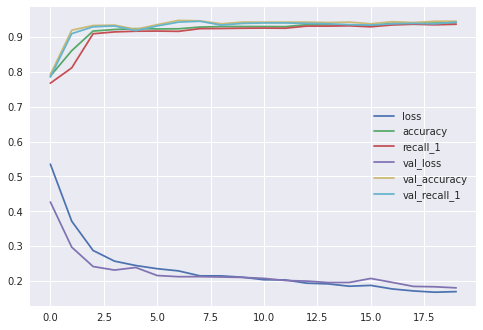

In [76]:
result_2.plot()